In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import csv
import sys
csv.field_size_limit(sys.maxsize)
df=pd.read_csv("Zomato_bangalore.csv", engine='python', on_bad_lines='skip')
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [ ]:
print(df.shape)
print(df.info())

(16980, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16980 entries, 0 to 16979
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          16980 non-null  object
 1   address                      16980 non-null  object
 2   name                         16980 non-null  object
 3   online_order                 16980 non-null  object
 4   book_table                   16980 non-null  object
 5   rate                         14392 non-null  object
 6   votes                        16980 non-null  int64 
 7   phone                        16625 non-null  object
 8   location                     16976 non-null  object
 9   rest_type                    16907 non-null  object
 10  dish_liked                   7446 non-null   object
 11  cuisines                     16967 non-null  object
 12  approx_cost(for two people)  16930 non-null  object
 13  reviews_list       

In [ ]:
df=df.drop(['url','phone',
            'menu_item','reviews_list'],axis=1)
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,"253, 1st Floor, 5th Main, 17th Cross, Sector 6...",Baar Union,No,Yes,4.6/5,634,HSR,"Bar, Pub","Masala Peanuts, Onion Rings, Cocktails, Biryan...","Continental, Finger Food, Asian, Chinese",850,Dine-out,HSR
16976,"436, 17th Cross, Sector 4, HSR Layout, HSR, Ba...",Cirkus,No,Yes,4.3/5,331,HSR,"Bar, Casual Dining","Cocktails, Chicken Bbq Wings, Pasta, Feta Sala...","North Indian, Continental, Fast Food, Beverage...","1,400",Dine-out,HSR
16977,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,Yes,No,4.5/5,196,HSR,Casual Dining,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...","Lebanese, Turkish","1,200",Dine-out,HSR
16978,"1548, 3rd Floor,19th Main Road, Sector 1, Agar...",Kitchen On Table,Yes,No,4.3/5,790,HSR,Casual Dining,"Sushi, Mocktails, Noodles, Salad, Fish, Miso S...","BBQ, Chinese, Japanese, Asian","1,000",Dine-out,HSR


In [ ]:
def clean_rate(x):
    x = str(x).strip()
    if x in ['NEW', '-', 'nan']:
        return np.nan
    return float(x.split('/')[0])

df['rate']=df['rate'].apply(clean_rate)
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,"253, 1st Floor, 5th Main, 17th Cross, Sector 6...",Baar Union,No,Yes,4.6,634,HSR,"Bar, Pub","Masala Peanuts, Onion Rings, Cocktails, Biryan...","Continental, Finger Food, Asian, Chinese",850,Dine-out,HSR
16976,"436, 17th Cross, Sector 4, HSR Layout, HSR, Ba...",Cirkus,No,Yes,4.3,331,HSR,"Bar, Casual Dining","Cocktails, Chicken Bbq Wings, Pasta, Feta Sala...","North Indian, Continental, Fast Food, Beverage...","1,400",Dine-out,HSR
16977,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,Yes,No,4.5,196,HSR,Casual Dining,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...","Lebanese, Turkish","1,200",Dine-out,HSR
16978,"1548, 3rd Floor,19th Main Road, Sector 1, Agar...",Kitchen On Table,Yes,No,4.3,790,HSR,Casual Dining,"Sushi, Mocktails, Noodles, Salad, Fish, Miso S...","BBQ, Chinese, Japanese, Asian","1,000",Dine-out,HSR


In [ ]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
      .astype(str).str.replace(',', '')
      .astype(float)
)
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,"253, 1st Floor, 5th Main, 17th Cross, Sector 6...",Baar Union,No,Yes,4.6,634,HSR,"Bar, Pub","Masala Peanuts, Onion Rings, Cocktails, Biryan...","Continental, Finger Food, Asian, Chinese",850.0,Dine-out,HSR
16976,"436, 17th Cross, Sector 4, HSR Layout, HSR, Ba...",Cirkus,No,Yes,4.3,331,HSR,"Bar, Casual Dining","Cocktails, Chicken Bbq Wings, Pasta, Feta Sala...","North Indian, Continental, Fast Food, Beverage...",1400.0,Dine-out,HSR
16977,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,Yes,No,4.5,196,HSR,Casual Dining,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...","Lebanese, Turkish",1200.0,Dine-out,HSR
16978,"1548, 3rd Floor,19th Main Road, Sector 1, Agar...",Kitchen On Table,Yes,No,4.3,790,HSR,Casual Dining,"Sushi, Mocktails, Noodles, Salad, Fish, Miso S...","BBQ, Chinese, Japanese, Asian",1000.0,Dine-out,HSR


In [ ]:
df.drop_duplicates(inplace=True)
df

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16975,"253, 1st Floor, 5th Main, 17th Cross, Sector 6...",Baar Union,No,Yes,4.6,634,HSR,"Bar, Pub","Masala Peanuts, Onion Rings, Cocktails, Biryan...","Continental, Finger Food, Asian, Chinese",850.0,Dine-out,HSR
16976,"436, 17th Cross, Sector 4, HSR Layout, HSR, Ba...",Cirkus,No,Yes,4.3,331,HSR,"Bar, Casual Dining","Cocktails, Chicken Bbq Wings, Pasta, Feta Sala...","North Indian, Continental, Fast Food, Beverage...",1400.0,Dine-out,HSR
16977,"1502, Ground Floor, Sector 1, HSR Layout, HSR,...",Bonum cibum,Yes,No,4.5,196,HSR,Casual Dining,"Shawarma, Pasta, Falafel, Mocktails, Babaganus...","Lebanese, Turkish",1200.0,Dine-out,HSR
16978,"1548, 3rd Floor,19th Main Road, Sector 1, Agar...",Kitchen On Table,Yes,No,4.3,790,HSR,Casual Dining,"Sushi, Mocktails, Noodles, Salad, Fish, Miso S...","BBQ, Chinese, Japanese, Asian",1000.0,Dine-out,HSR


In [ ]:
print(df.isnull().sum())


address                           0
name                              0
online_order                      0
book_table                        0
rate                           3498
votes                             0
location                          4
rest_type                        73
dish_liked                     9505
cuisines                         13
approx_cost(for two people)      49
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


In [ ]:
print(df)


                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
16975  253, 1st Floor, 5th Main, 17th Cross, Sector 6...   
16976  436, 17th Cross, Sector 4, HSR Layout, HSR, Ba...   
16977  1502, Ground Floor, Sector 1, HSR Layout, HSR,...   
16978  1548, 3rd Floor,19th Main Road, Sector 1, Agar...   
16979        64&65, 27th Main Road, Sector 1, HSR Layout   

                        name online_order book_table  rate  votes  \
0                      Jalsa          Yes        Yes   4.1    775   
1             Spice Elephant          Yes         No   4.1    787   
2            San Churro Cafe          Yes         No   3.8    918   
3  

In [ ]:
df.dropna(subset=['rate','approx_cost(for two people)','location'], inplace=True)
print(df.isnull().sum())

address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
location                          0
rest_type                        52
dish_liked                     6034
cuisines                          2
approx_cost(for two people)       0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


In [ ]:
print(df.describe())

               rate         votes  approx_cost(for two people)
count  13395.000000  13395.000000                 13395.000000
mean       3.678253    314.921762                   598.335797
std        0.439516    787.412639                   465.409741
min        1.800000      0.000000                    40.000000
25%        3.400000     21.000000                   300.000000
50%        3.700000     68.000000                   450.000000
75%        4.000000    244.000000                   700.000000
max        4.900000  16345.000000                  4000.000000


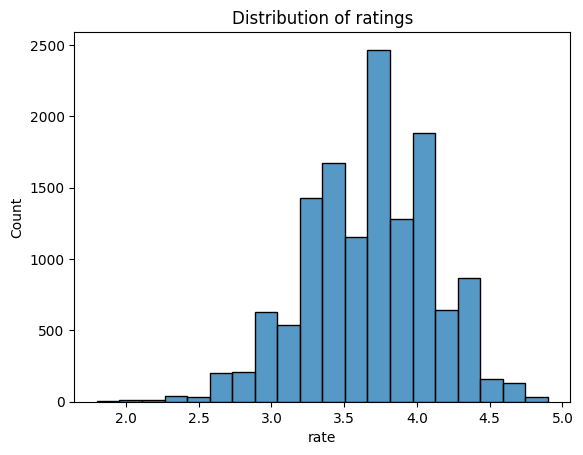

In [ ]:
import seaborn as sns
sns.histplot(df['rate'],bins=20)
plt.title("Distribution of ratings")
plt.show()

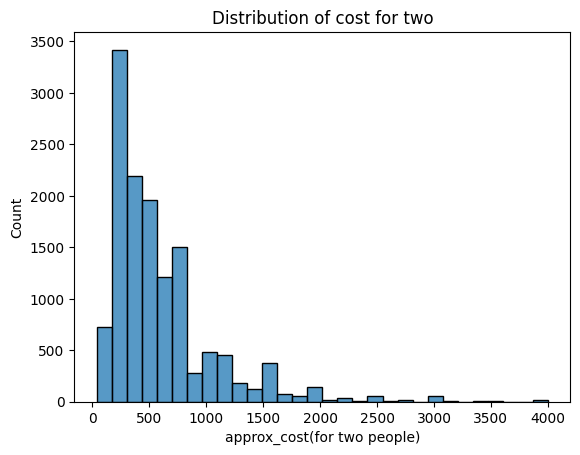

In [ ]:
sns.histplot(df['approx_cost(for two people)'],bins=30)
plt.title("Distribution of cost for two")
plt.show()

In [ ]:
top_locations=(df['location'].value_counts().head(10))
print(top_locations)

location
BTM                  1079
HSR                   859
Electronic City       829
Bannerghatta Road     773
JP Nagar              692
Jayanagar             656
Banashankari          628
Bellandur             546
Marathahalli          484
Whitefield            461
Name: count, dtype: int64


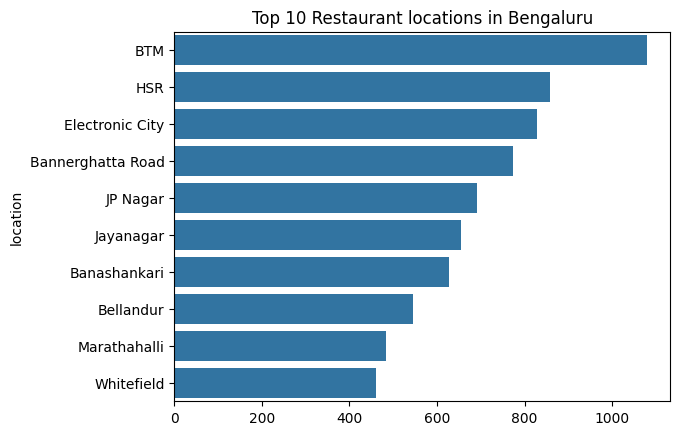

In [ ]:
sns.barplot(y=top_locations.index,x=top_locations.values)
plt.title("Top 10 Restaurant locations in Bengaluru")
plt.show()

In [ ]:
from numpy._core.defchararray import strip
top_cuisines=(df['cuisines'].str.split(',').explode().str.strip().value_counts().head(10))
print(top_cuisines)


cuisines
North Indian    5702
Chinese         4160
South Indian    2215
Fast Food       2132
Biryani         1647
Continental     1576
Cafe            1525
Desserts        1502
Beverages       1212
Italian          999
Name: count, dtype: int64


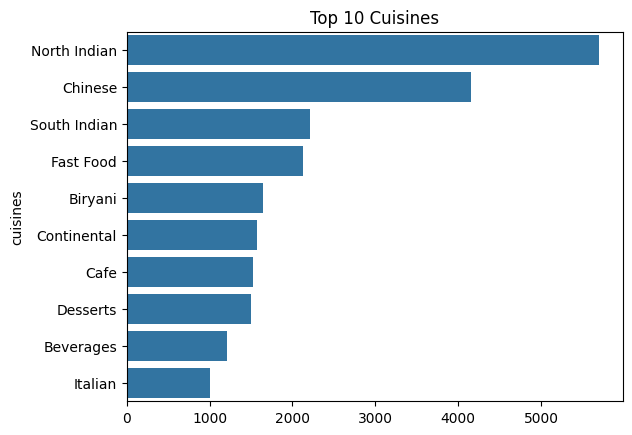

In [ ]:
sns.barplot(y=top_cuisines.index,x=top_cuisines.values)
plt.title("Top 10 Cuisines")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.12/dist-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


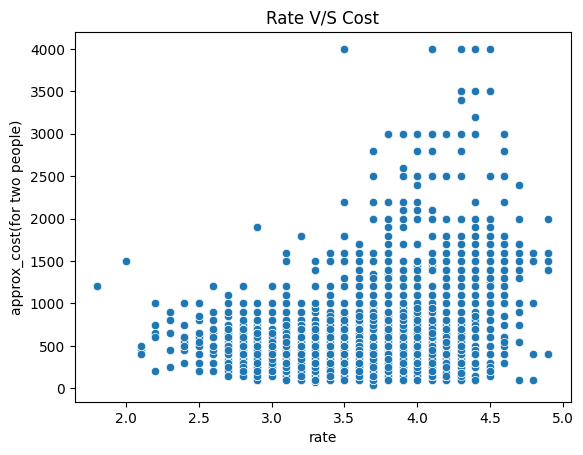

In [ ]:
sns.scatterplot(x=df['rate'],y=df['approx_cost(for two people)'],cmap='viridis')
plt.title("Rate V/S Cost")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.12/dist-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


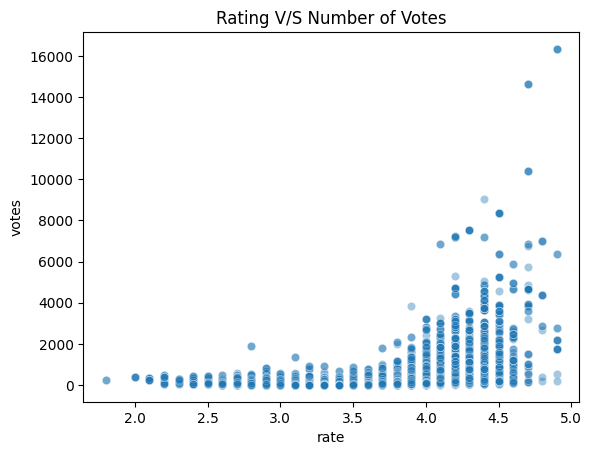

In [ ]:
sns.scatterplot(x=df['rate'],y=df['votes'],cmap='viridis',alpha=0.4)
plt.title("Rating V/S Number of Votes")
plt.show()

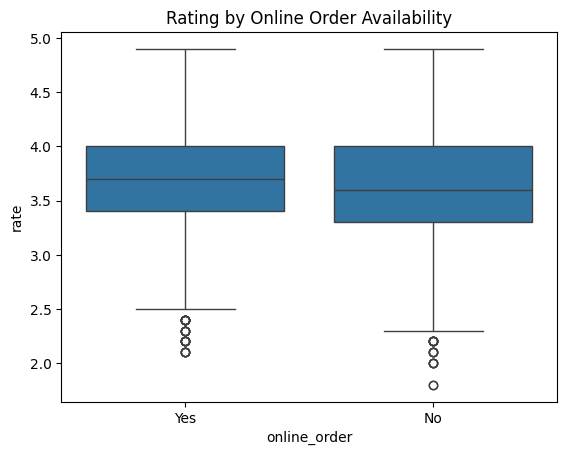

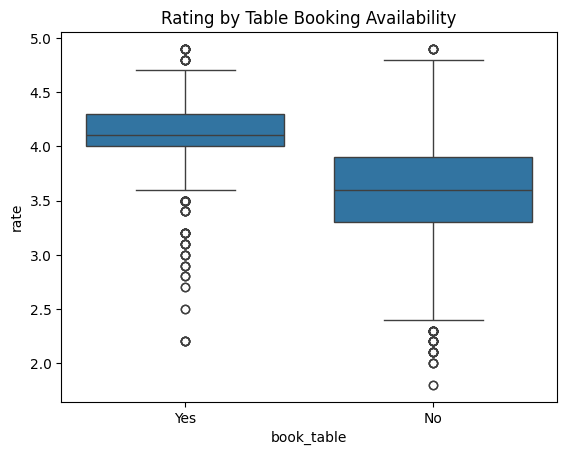

In [ ]:
sns.boxplot(data=df, x='online_order', y='rate')
plt.title("Rating by Online Order Availability")
plt.show()

sns.boxplot(data=df, x='book_table', y='rate')
plt.title("Rating by Table Booking Availability")
plt.show()


In [ ]:
import pandas as pd
df.to_csv('cleaned_zomato_bengaluru.csv', index=False)